# Exploratory Data Analysis (EDA)

--> As the name suggests, EDA is nothing but analysisng the data.

--> We analysie the characteristics of the data and plotting it so that, we can build better models and algorithms to attain our goal.

--> In this assignment, we are performing EDA on haberman's survival dat set.

--> The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

--> This study was conducted on 306 patients.

--> Each patient's age, year of operation and lymph nodes are collected. We consider these as features. 

--> A lymph node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present.

--> Our objective is to build a model which can classify whether the patient survied(1) 5 years or longer, or died(2) within 5 years after undergoing surgery.

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('haberman.csv')
data

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [2]:
data.shape

(306, 4)

In [3]:
data.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [4]:
data.describe(include='all')

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


As in the haberman dataset, the dependent variable contains integer data types. We convert it to categorical data types to consider them as two classes.
In this case the classes are Survived and Deceased.

In [5]:
data['status'] = data['status'].apply(lambda x: 
                'Survived' if x == 1 else "Deceased")
data['status'].value_counts()

#Observation:
#The Survived patients are 2.7 X the Deceased patients

Survived    225
Deceased     81
Name: status, dtype: int64

# Scatter Plots:

Scatter plots are used to see the distribition of the points with respect to two features. In this case the features are year and nodes.

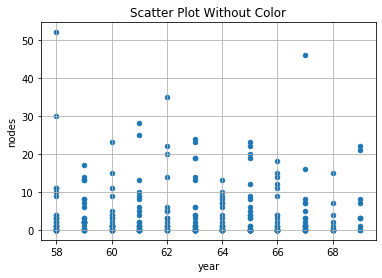

In [6]:
#Scatter plot without colored points
data.plot(kind='scatter', x = 'year', y = 'nodes')
plt.title('Scatter Plot Without Color')
plt.grid()
plt.show()

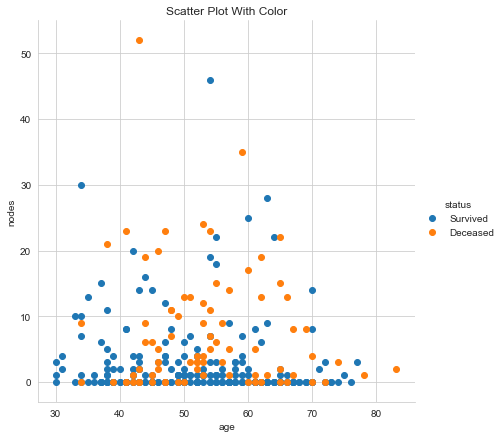

In [7]:
#Scatter plot with colored points
sb.set_style("whitegrid")
sb.FacetGrid(data, hue="status", height=6).map(plt.scatter, "age", 
                                    "nodes").add_legend()
plt.title('Scatter Plot With Color')
plt.show()

#Observations :
#The data points belonging to both classes are heavily overlaping
#It is not possible to draw line which seperates the two classes

# Pair-Plot

Pair-plot is a scatter plot obtained by pairs of combinations of all the features of our data.

As this plot is features dependent, it can't be used when the features are on the higher side.

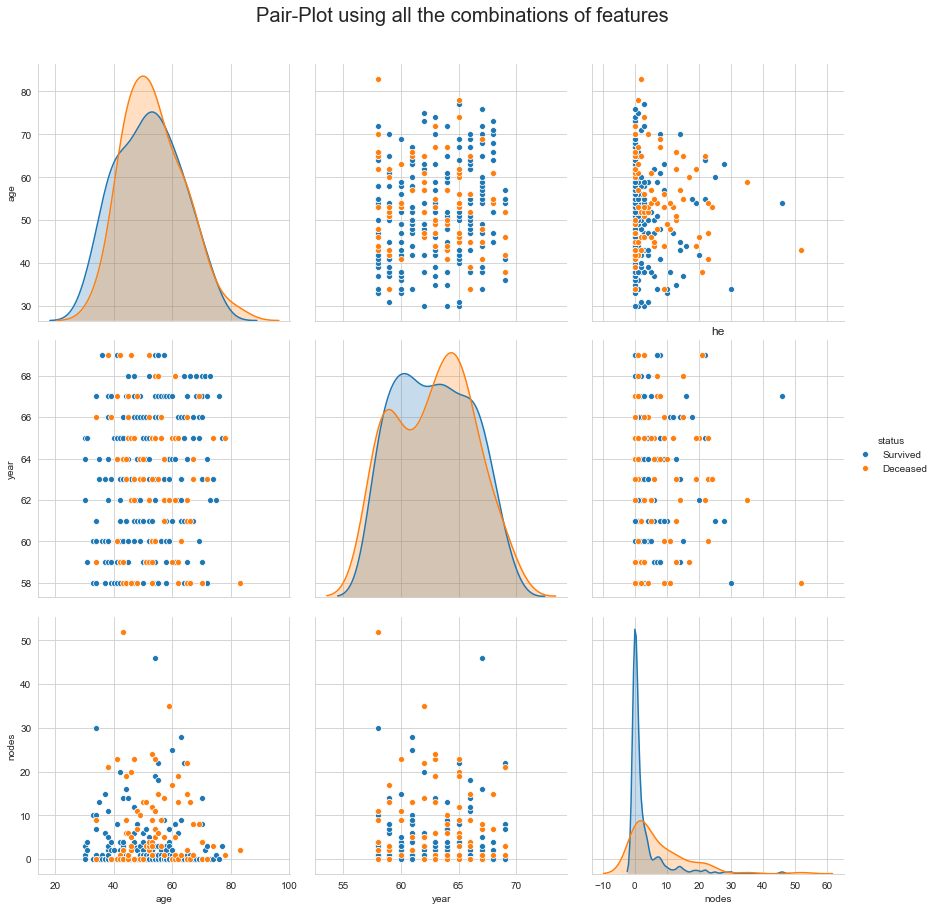

In [8]:
sb.set_style("whitegrid")
sb.pairplot(data, hue="status", height=4).fig.suptitle('Pair-Plot using all the combinations of features', fontsize=20, y = '1.05')
plt.show()

#Observations :
#The data points belonging to both classes are heavily
#overlaping for all combinations of the features.
#It is not possible to seperate the two classes with conditions.

In [9]:
#Representation of data using 3D plot
#This is obtained by importing the library plotly
import plotly.express as px
fig = px.scatter_3d(data, x='age', y='year', z='nodes', title ='3D Representation of data using plotly',
              color='status')
fig.show()

#Observations :
#The data points belonging to both classes are heavily overlaping
#It is not possible to draw plane which seperates the two classes in this case

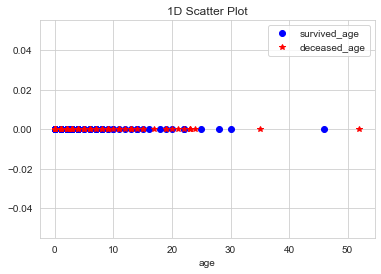

In [10]:
#1D scatter plot is a scatter plot with a single feature
#In this case we copy the data belonging to two classes
#into survived and deceased

survived = data[data['status'] == 'Survived']
deceased = data[data['status'] == 'Deceased']
plt.xlabel('age')
plt.plot(survived['nodes'], np.zeros_like(survived['age']), 'bo', label ='survived_age')
plt.plot(deceased['nodes'], np.zeros_like(deceased['age']), 'r*', label ='deceased_age')
plt.title('1D Scatter Plot')
plt.legend()
plt.show()

# Histogram and PDF

Histograms gives us the number of points present in a perticular window.

The x-axis is the feature from our dataset and y axis is the count.

The height of the histogram represents how often we find a perticular value related to the feature.

The height of the histogram will be more if the value occurs more frequently and vice-versa.

PDFs are in simple words, the smoothed form of histograms

PDFs are obtained using the Kernal Density Estimation (KDE)

PDF is obtained by dividing the number of points in an interval by the total number of data points

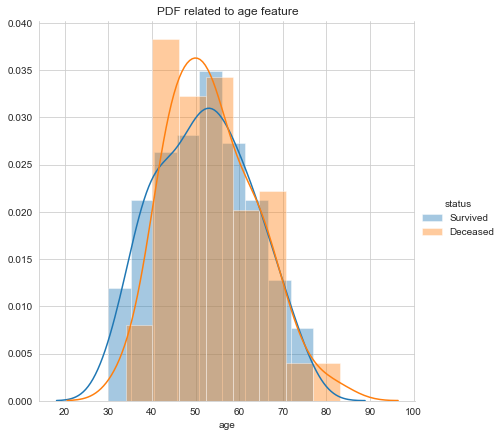

In [11]:
sb.FacetGrid(data, hue = 'status', height = 6).map(sb.distplot,
                                            'age').add_legend()
plt.title('PDF related to age feature')
plt.show()

#Observations :
#The PDFs of both classes are overlaping hence, can't use a condition to
#differentiate them

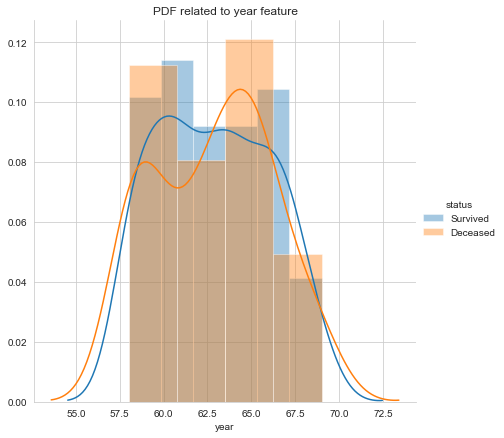

In [12]:
sb.FacetGrid(data, hue = 'status', height = 6).map(sb.distplot,
                                            'year').add_legend()

plt.title('PDF related to year feature')
plt.show()

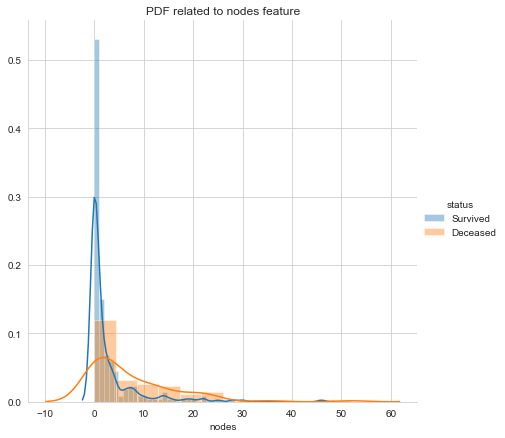

In [13]:
sb.FacetGrid(data, hue = 'status', height = 6).map(sb.distplot,
                                            'nodes').add_legend()

plt.title('PDF related to nodes feature')
plt.show()

# Cumulative Distribution Function

CDFs tells us what percentage of data points lay under a feature value

CDF is obtained by adding all the pdf values of the data point

CDF is the inegration of PDF and PDF is differentiation of CDF

CDF always starts at 0 and ends with 1 (0% - 100%)


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


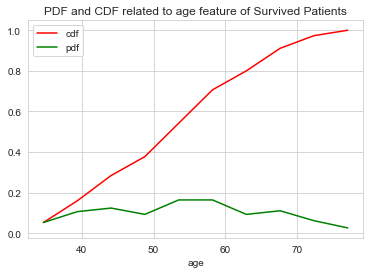

In [14]:
number_of_Points, bin_edges = np.histogram(survived['age'],
                                bins = 10, density='True')

pdf = number_of_Points/sum(number_of_Points)
cdf = np.cumsum(pdf)
plt.xlabel('age')
plt.plot(bin_edges[1:], cdf, 'r-', label = 'cdf')
plt.plot(bin_edges[1:], pdf, 'g-', label = 'pdf')

plt.title('PDF and CDF related to age feature of Survived Patients')
plt.legend()
plt.show
print(pdf)
print(cdf)
print(bin_edges)

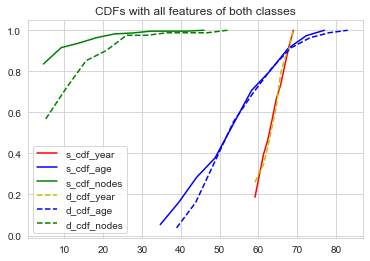

In [15]:
#CDFs of all the 6 combinations of features and classes

number_of_Points, bin_edges = np.histogram(survived['year'],
                                    bins = 10, density='True')
pdf = number_of_Points/sum(number_of_Points)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, 'r-', label = 's_cdf_year')

number_of_Points, bin_edges = np.histogram(survived['age'],
                                    bins = 10, density='True')
pdf = number_of_Points/sum(number_of_Points)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, 'b-', label = 's_cdf_age')
number_of_Points, bin_edges = np.histogram(survived['nodes'], 
                                    bins = 10, density='True')
pdf = number_of_Points/sum(number_of_Points)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, 'g-', label = 's_cdf_nodes')


number_of_Points, bin_edges = np.histogram(deceased['year'], 
                                    bins = 10, density='True')
pdf = number_of_Points/sum(number_of_Points)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, 'y--', label = 'd_cdf_year')

number_of_Points, bin_edges = np.histogram(deceased['age'], 
                                    bins = 10, density='True')
pdf = number_of_Points/sum(number_of_Points)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, 'b--', label = 'd_cdf_age')
number_of_Points, bin_edges = np.histogram(deceased['nodes'], 
                                    bins = 10, density='True')
pdf = number_of_Points/sum(number_of_Points)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, 'g--', label = 'd_cdf_nodes')

plt.title('CDFs with all features of both classes')

plt.legend()
plt.show()



#  Mean, Median, Variance & Standard Deviation

Mean is the average value.
It is obtained by the formula (sum of values of datapoints)/(number of datapoints)

Median is the middle value obtained by arrange the datapoints in ascending order with respect to their values.
Median of odd numbered dataset is value at (n+1)/2 position.
For even numbered set we take the average of two middle values.

Outliers can corrupt the mean value to a greater extent when compared to median 

Variance is the average squared distance of each point from the mean.

Standard deviation is the distance of a point from the mean value.
It is the squareroot of variance

In [16]:
print('Mean values of Survived:')
print('Age : ',np.mean(survived['age']))
print('Year : ',np.mean(survived['year']))
print('Nodes :',np.mean(survived['nodes']))

print('\n\nMean values of Deceased:')
print('Age : ',np.mean(deceased['age']))
print('Year : ',np.mean(deceased['year']))
print('Nodes :',np.mean(deceased['nodes']))

print('\n\nMedian values of Survived:')
print('Age : ',np.median(survived['age']))
print('Year : ',np.median(survived['year']))
print('Nodes :',np.median(survived['nodes']))

print('\n\nMedian values of Deceased:')
print('Age : ',np.median(deceased['age']))
print('Year : ',np.median(deceased['year']))
print('Nodes :',np.median(deceased['nodes']))

print('\n\nStandard Deviation values of Survived:')
print('Age : ',np.std(survived['age']))
print('Year : ',np.std(survived['year']))
print('Nodes :',np.std(survived['nodes']))

print('\n\nStandard Deviation values of Deceased:')
print('Age : ',np.std(deceased['age']))
print('Year : ',np.std(deceased['year']))
print('Nodes :',np.std(deceased['nodes']))

print('\n\nVariance values of Survived:')
print('Age : ',np.var(survived['age']))
print('Year : ',np.var(survived['year']))
print('Nodes :',np.var(survived['nodes']))

print('\n\nVariance values of Deceased:')
print('Age : ',np.var(deceased['age']))
print('Year : ',np.var(deceased['year']))
print('Nodes :',np.var(deceased['nodes']))

#Observations :
#The age and year values are almost same for both the classes
#Nodes is the only feature which is slightly different for both classes

Mean values of Survived:
Age :  52.01777777777778
Year :  62.86222222222222
Nodes : 2.7911111111111113


Mean values of Deceased:
Age :  53.67901234567901
Year :  62.82716049382716
Nodes : 7.45679012345679


Median values of Survived:
Age :  52.0
Year :  63.0
Nodes : 0.0


Median values of Deceased:
Age :  53.0
Year :  63.0
Nodes : 4.0


Standard Deviation values of Survived:
Age :  10.987655475100508
Year :  3.2157452144021947
Nodes : 5.857258449412138


Standard Deviation values of Deceased:
Age :  10.104182193031312
Year :  3.3214236255207887
Nodes : 9.128776076761635


Variance values of Survived:
Age :  120.72857283950617
Year :  10.341017283950617
Nodes : 34.30747654320988


Variance values of Deceased:
Age :  102.09449778997104
Year :  11.03185490016766
Nodes : 83.33455265965554


# Percentiles and Quantiles

Percentile value gives us the percentage of points whose values are less than or greater than this value.

Quantiles are the values at the quarter percentile.

Inner Quantile Range (IQR) is the difference between two quantiles,
it gives us the percentage of points which lies in this range. 

In [17]:
print('Quantile values for Survived:')
print('Age : ',np.percentile(survived['age'],np.arange(25,125,25)))
print('Year : ',np.percentile(survived['year'],np.arange(25,125,25)))
print('Nodes :',np.percentile(survived['nodes'],np.arange(25,125,25)))

print('\n\nQuantile values for Deceased:')
print('Age : ',np.percentile(deceased['age'],np.arange(25,125,25)))
print('Year : ',np.percentile(deceased['year'],np.arange(25,125,25)))
print('Nodes :',np.percentile(deceased['nodes'],np.arange(25,125,25)))

print('\n\n90th Percentile values for Survived:')
print('Age : ',np.percentile(survived['age'],90))
print('Year : ',np.percentile(survived['year'],90))
print('Nodes :',np.percentile(survived['nodes'],90))

print('\n\n90th Percentile values for Deceased:')
print('Age : ',np.percentile(deceased['age'],90))
print('Year : ',np.percentile(deceased['year'],90))
print('Nodes :',np.percentile(deceased['nodes'],90))

#Observations :
#The age and year values are almost same for both the classes
#Nodes is the only feature which is slightly different for both classes

Quantile values for Survived:
Age :  [43. 52. 60. 77.]
Year :  [60. 63. 66. 69.]
Nodes : [ 0.  0.  3. 46.]


Quantile values for Deceased:
Age :  [46. 53. 61. 83.]
Year :  [59. 63. 65. 69.]
Nodes : [ 1.  4. 11. 52.]


90th Percentile values for Survived:
Age :  67.0
Year :  67.0
Nodes : 8.0


90th Percentile values for Deceased:
Age :  67.0
Year :  67.0
Nodes : 20.0


# Median Absolute Deviation

MAD is the median of the absolute value of the difference between point and median.

MAD is similar to standard deviation.

It is used to obtain the distance between points and median (spread).

In [18]:
from statsmodels import robust
print('Median Absolute Deviation values of Survived :')
print(robust.mad(survived['age']))
print(robust.mad(survived['year']))
print(robust.mad(survived['nodes']))

print('\n\nMedian Absolute Deviation values of Deceased :')
print(robust.mad(deceased['age']))
print(robust.mad(deceased['year']))
print(robust.mad(deceased['nodes']))

Median Absolute Deviation values of Survived :
13.343419966550417
4.447806655516806
0.0


Median Absolute Deviation values of Deceased :
11.860817748044816
4.447806655516806
5.930408874022408


# Box Plot & Whiskers

Box plot gives us the quantiles and percentiles values.

This is most useful when we consider a treshold value to define an overlaping class. We can check what percentage of points will be from other classes.

Whiskers are the lines on the top and bottom of the boxes.

There are no hard and fast rules to define whiskers, some consider the min and max values as whiskers whereas in numpy 1.5 X IQR are considered as whisker values.

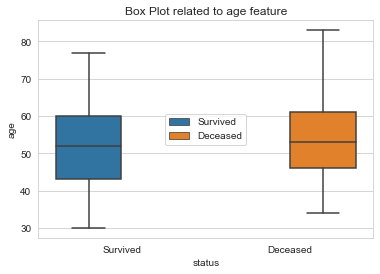

In [19]:
sb.boxplot(hue ='status', x = 'status', y = 'age', data = data)
plt.title('Box Plot related to age feature')
plt.legend(loc = 'center')
plt.show()

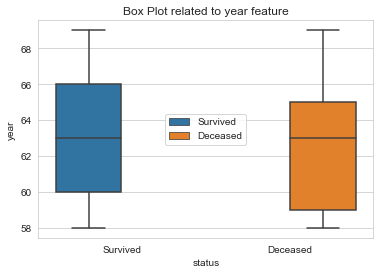

In [20]:
sb.boxplot(hue ='status', x = 'status', y = 'year', data = data)
plt.title('Box Plot related to year feature')
plt.legend(loc = 'center')
plt.show()

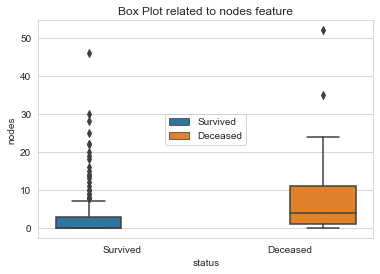

In [21]:
sb.boxplot(hue ='status', x = 'status', y = 'nodes', data = data)
plt.title('Box Plot related to nodes feature')
plt.legend(loc = 'center')
plt.show()

# Violin plots

Named violin plots because of their shape.

Violin plots gives us the best of both pdf and box plots.

The box inside the violin shape are the box plots.

The sides are the pdfs.

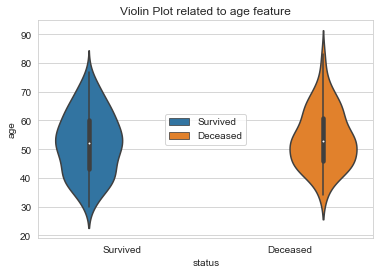

In [22]:
sb.violinplot(hue ='status', x = 'status', y = 'age', data = data, height = 3)
plt.legend(loc = 'center')
plt.title('Violin Plot related to age feature')
plt.show()

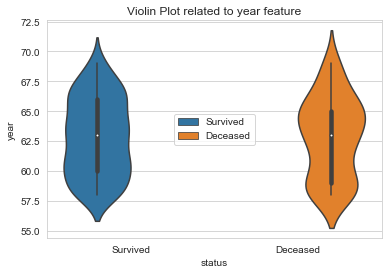

In [23]:
sb.violinplot(hue ='status', x = 'status', y = 'year', data = data, height = 3)
plt.title('Violin Plot related to year feature')
plt.legend(loc = 'center')
plt.show()

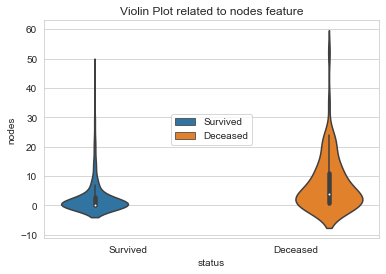

In [24]:
sb.violinplot(hue ='status', x = 'status', y = 'nodes', data = data, height = 3)
plt.title('Violin Plot related to nodes feature')
plt.legend(loc = 'center')
plt.show()

# Definitions :

Univariate analysis is analysing the data using a single feature.
In this dataset all the plots obtained by taking any one of the three features (age, year, nodes) is called univariate analysis.

Bivariate analysis is taking the combination of two features and analysing with the help of pair-plots and scatter plots is called bivariate analysis.

Multivariate analysis is taking more than two features to analysie the data.
In this assignment we performed multivariate analysis by ploting a 3D scatter plot.

# Multivariate Probability Density, Contour Plot

Multivariate Probability Density, contour plots are density plots with more than one feature.

The darker areas represents that the density of points is more the fading contours represents less dense points.

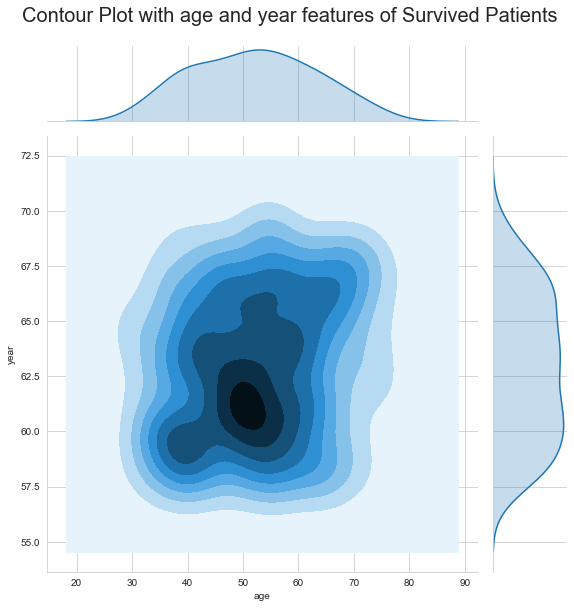

In [25]:

sb.jointplot(x = 'age', y = 'year', data = survived, kind = 
             'kde', height=8).fig.suptitle(
    'Contour Plot with age and year features of Survived Patients', fontsize=20, y=1.05)

plt.show()

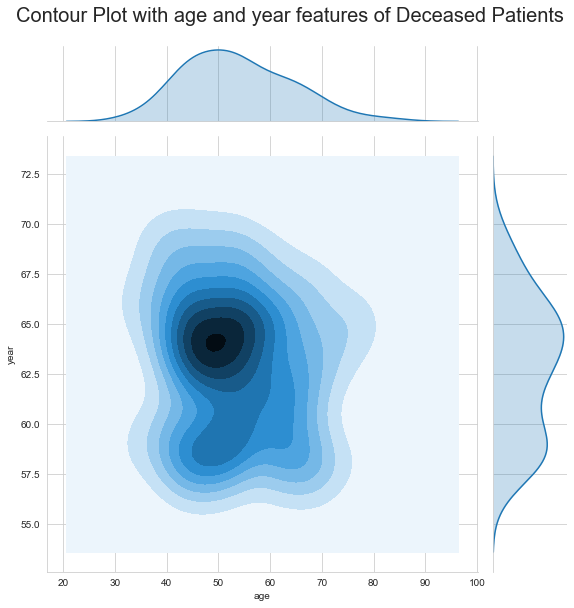

In [26]:
sb.jointplot(x = 'age', y = 'year', data = deceased, kind = 
             'kde', height=8).fig.suptitle(
    'Contour Plot with age and year features of Deceased Patients', fontsize=20, y=1.05)

plt.show()

# Observations :

In this dataset The Survived patients are 2.7 X the Deceased patients

'age' and 'year' features are heavily overlaping and has almost
identical values, whereas 'nodes' features has slightly different 
values.

But, none of these features and data is helpful in
easily differentiating the classes.